# PROJECT OVERVIEW

This project implements an end-to-end Image Classification pipeline using a Dense Neural Network (ANN) on the popular MNIST Handwritten Digits dataset.
The goal is to correctly classify digits (0–9) from grayscale images of size 28×28.

## KEY FEATURE

✅ Data preprocessing & normalization
✅ Baseline Dense Neural Network model using TensorFlow/Keras
✅ Training + validation performance monitoring
✅ Confusion matrix + classification report for evaluation
✅ Misclassification analysis (wrong predictions visualization)
✅ Clean and reproducible notebook structure

In [4]:
# pip install tensorflow


In [5]:
# import The libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential,regularizers
from tensorflow.keras.layers import Dense,Dropout

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Lets get the Data
(x_train ,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [7]:
# Lets check the shape
print('X Train : ',x_train.shape)
print('Y Train : ',y_train.shape)
print('X Test : ',x_test.shape)
print('Y Test : ',y_test.shape)

X Train :  (60000, 28, 28)
Y Train :  (60000,)
X Test :  (10000, 28, 28)
Y Test :  (10000,)


### Dataset

## Dataset: Fashion-MNIST

Fashion-MNIST is a dataset of **70,000 grayscale images** of clothing items in **10 categories**.
- Training set: 60,000 images
- Test set: 10,000 images
- Image size: 28 × 28

Each image belongs to one of these classes:
0 T-shirt/top | 1 Trouser | 2 Pullover | 3 Dress | 4 Coat  
5 Sandal | 6 Shirt | 7 Sneaker | 8 Bag | 9 Ankle boot


### Inference
Although Fashion-MNIST has the same shape as MNIST, it is **more challenging** because classes are visually similar  
(e.g., Shirt vs T-shirt, Sneaker vs Ankle boot). This makes it a better dataset for demonstrating real classification behavior.


In [8]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
pd.Series(y_train).unique()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)

In [11]:
# Lets give the label names
label_names = ['T-Shirt/Top',   # Label 0
               'Trouser',       # Label 1 and so on
               'Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle Boot']

In [12]:
# Lets see the images that we have
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [13]:
# this is the pixel

28*28

784

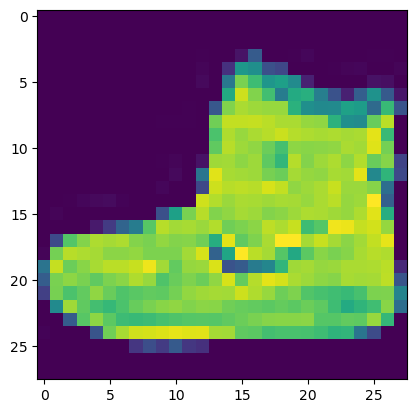

In [14]:
# to see the image
plt.imshow(x_train[0])

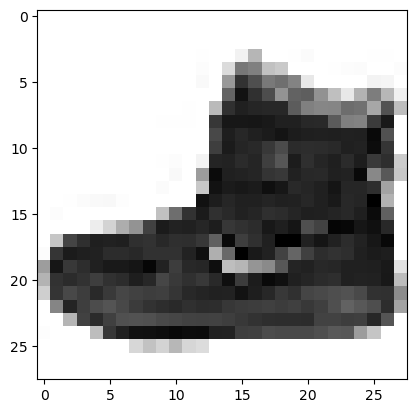

In [15]:
# to see the image in gray scale
plt.imshow(x_train[0],cmap='binary')

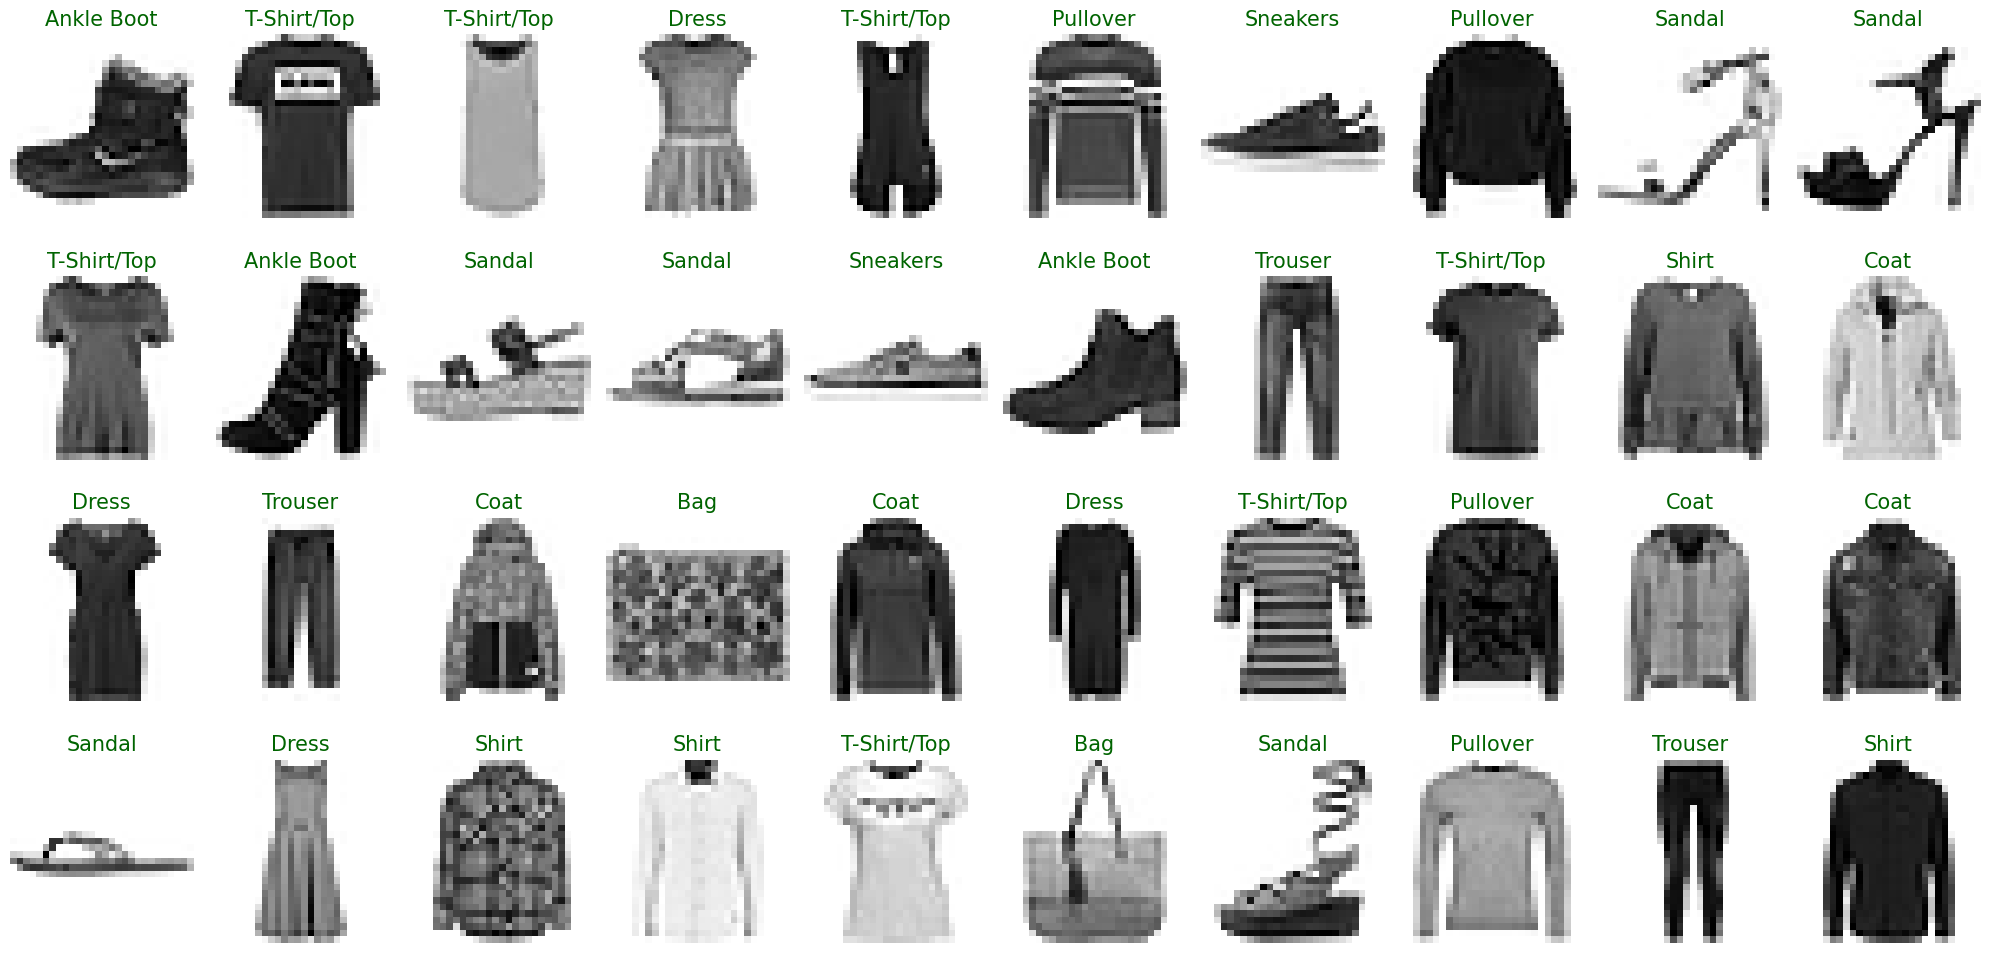

In [16]:
# see the image of 40
nrows = 4
ncols = 10
t = 1
plt.figure(figsize=(20,10))
for i in range(nrows*ncols):
  plt.subplot(nrows,ncols,t)
  plt.imshow(x_train[i],cmap='binary')
  plt.title(f'{label_names[y_train[i]]}',color ='darkgreen',fontsize = 15)
  plt.axis('off')
  t+=1
plt.tight_layout()
plt.show()

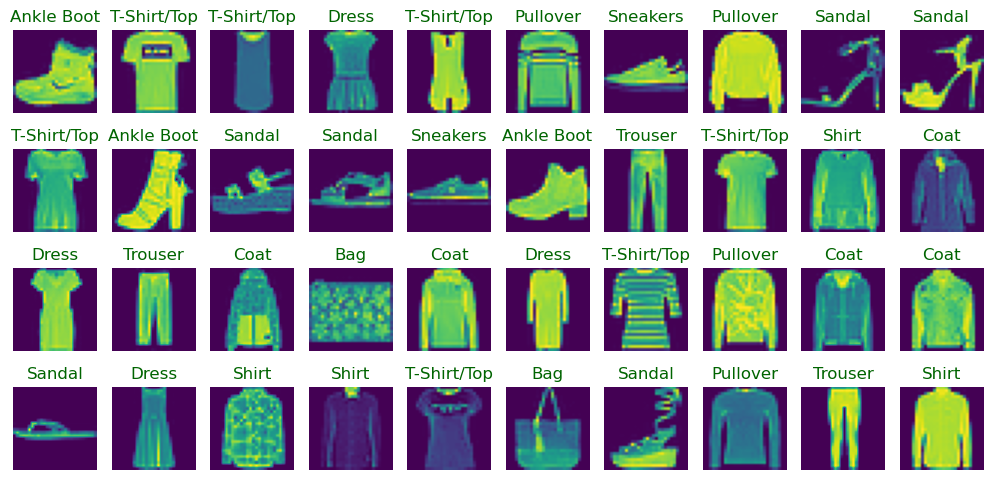

In [17]:
# see the image of 40
nrows = 4
ncols = 10
t = 1
plt.figure(figsize=(10,5))
for i in range(nrows*ncols):
  plt.subplot(nrows,ncols,t)
  plt.imshow(x_train[i])
  plt.title(f'{label_names[y_train[i]]}',color ='darkgreen',fontsize = 12)
  plt.axis('off')
  t+=1
plt.tight_layout()
plt.show()

# DATA PREPROCESSING

In [18]:
# Lets scale the data first (between 0 and 1)
x_train_s = x_train/255
x_test_s = x_test/255


### Inference
Scaling pixel values from [0–255] to [0–1] improves gradient stability and speeds up convergence in neural networks.


In [19]:
x_train.max(),x_train.min()

(np.uint8(255), np.uint8(0))

In [20]:
x_train_s.max(),x_train_s.min()

(np.float64(1.0), np.float64(0.0))

In [21]:
x_train_s.ndim

3

In [22]:
# reshape the data from 3- dimension to 2-dimension from shape of
# 60000 x 28 x 28 ------> 60000 x 784 (Train)
# 10000 x 28 x 28 ---------> 10000 x 784 (Test)

x_train_s = x_train_s.reshape(60000,28*28)
x_test_s = x_test_s.reshape(10000,28*28)

### Inference
Flattening images converts each 28×28 image into a 784-dimensional vector, enabling it to be used as input for Dense layers.  
However, this removes spatial structure (like edges and shapes), which may limit performance compared to CNNs.


In [23]:
x_train_s

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
x_train_s.shape,x_test_s.shape

((60000, 784), (10000, 784))

In [25]:
pd.DataFrame(x_train_s)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.258824,0.211765,0.196078,0.019608,0.0,0.003922,0.0,0.0,0.0,0.0


🧠 Model Architecture (Dense Neural Network)

The model uses a fully connected neural network approach by flattening the image:

Input: 784 features (28×28 flattened)

Hidden Layers: Dense layers with ReLU activation

Output: Dense layer with Softmax for 10-class classification

# NEURAL NETWORK

In [26]:
model = Sequential()

# Lets add 1st dense layer
model.add(Dense(1000,input_shape = (784,),activation='relu',kernel_regularizer=regularizers.L1(0.0001)))
model.add(Dropout(0.2))

# Second layer
model.add(Dense(700,activation='relu'))
model.add(Dropout(0.2))
# third layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.2))
# Fourth layer
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
# Output layer
model.add(Dense(10,activation='softmax'))

# Lets check model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 700)            │       700,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 700)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       350,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,887,310 (7.20 MB)

 Trainable params: 1,887,310 (7.20 MB)

 Non-trainable params: 0 (0.00 B)

### Inference
- Dropout reduces overfitting by forcing the network to learn more general features.  
- A very high L1 penalty (like 0.01) may cause underfitting by making weights too small, reducing model learning capacity.


In [27]:
# Lets compile this model

model.compile(optimizer='adam',loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
history = model.fit(x_train_s,y_train,epochs=25,batch_size=10000)

Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 517ms/step - accuracy: 0.4232 - loss: 3.8360
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 523ms/step - accuracy: 0.6667 - loss: 2.9485
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 506ms/step - accuracy: 0.7480 - loss: 2.5783
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 477ms/step - accuracy: 0.7803 - loss: 2.3307
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 495ms/step - accuracy: 0.8112 - loss: 2.1233
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 517ms/step - accuracy: 0.8274 - loss: 1.9516
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 489ms/step - accuracy: 0.8354 - loss: 1.8009
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 480ms/step - accuracy: 0.8432 - loss: 1.6741
Epoch 9/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 486ms/step - accuracy: 0.8477 - loss: 1.5629
Epoch 10/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 495ms/step - accuracy: 0.8536 - loss: 1.4665
Epoch 11/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 494ms/step - accuracy: 0.8588 - loss: 1.3853
Epoch 12/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 484ms/step - accuracy: 0.8612 - lo

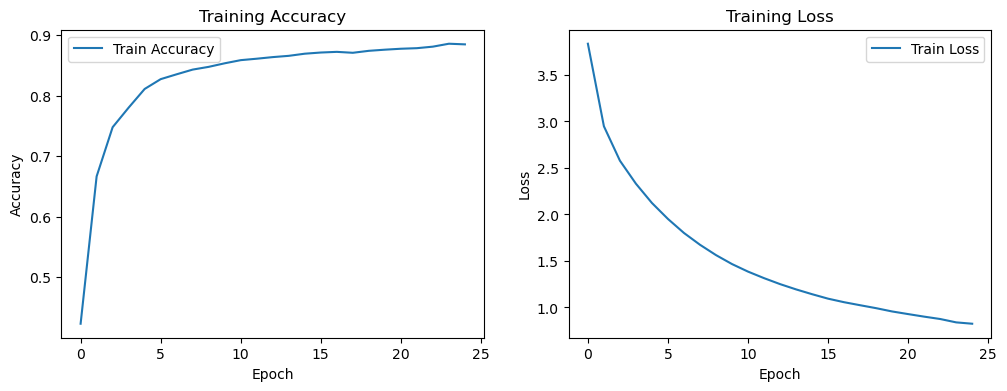

In [29]:
plt.figure(figsize=(12,4))

# Accuracy Curve
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss Curve
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()



### Inference (Training Curves)
Since validation data was not used during training, only **training accuracy and training loss** curves are available.
To monitor overfitting more properly, validation_split or a separate validation set can be included in training.


In [30]:
# Lets check accuracy on test data
test_loss, test_acc = model.evaluate(x_test_s, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")


✅ Test Accuracy: 0.8715
✅ Test Loss: 0.8512


### Inference (Final Evaluation)
Test accuracy represents the real generalization performance of the model on unseen data, and is the most important metric for final reporting.


In [31]:
# the model is close to generalization a lillte overfit

In [32]:
# Lets take the predictions

ypred = model.predict(x_test_s)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [33]:
ypred
# this is soft max of all 10 neurons

array([[3.3993743e-05, 9.0054076e-05, 4.4312201e-05, ..., 1.1652085e-02,
        1.4676289e-04, 9.8617977e-01],
       [4.4797806e-04, 8.3843097e-06, 9.7639126e-01, ..., 1.1580244e-06,
        3.9923551e-05, 1.2652745e-06],
       [5.2341687e-08, 9.9999976e-01, 7.4492181e-09, ..., 4.7052785e-11,
        7.2684871e-09, 7.1108297e-10],
       ...,
       [9.7703957e-04, 5.6138238e-06, 4.6224959e-05, ..., 2.9427687e-05,
        9.9848676e-01, 8.0330374e-06],
       [8.7916419e-07, 9.9995589e-01, 1.0406683e-06, ..., 8.2997211e-08,
        4.4859996e-07, 8.0593583e-07],
       [4.6300370e-04, 2.5529935e-04, 2.3809230e-04, ..., 3.2499507e-02,
        5.4044118e-03, 7.2199490e-04]], dtype=float32)

In [34]:
ypred_label = np.argmax(ypred,axis=1)

In [35]:
ypred_label

array([9, 2, 1, ..., 8, 1, 5])

In [36]:
# Lets see the classification report

print('CLASSIFICATION REPORT :\n',classification_report(y_test,ypred_label))

CLASSIFICATION REPORT :
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.81      0.76      0.79      1000
           3       0.85      0.91      0.88      1000
           4       0.83      0.70      0.76      1000
           5       0.96      0.96      0.96      1000
           6       0.64      0.72      0.68      1000
           7       0.94      0.93      0.93      1000
           8       0.94      0.98      0.96      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



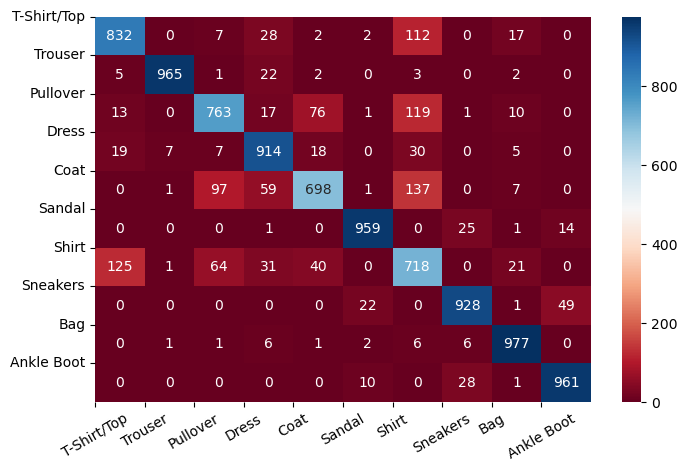

In [37]:
# Lets look at the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,ypred_label),annot=True,cmap='RdBu',fmt='d')
plt.xticks(range(10),label_names,rotation = 30)
plt.yticks(range(10),label_names,rotation = 'horizontal')
plt.show()

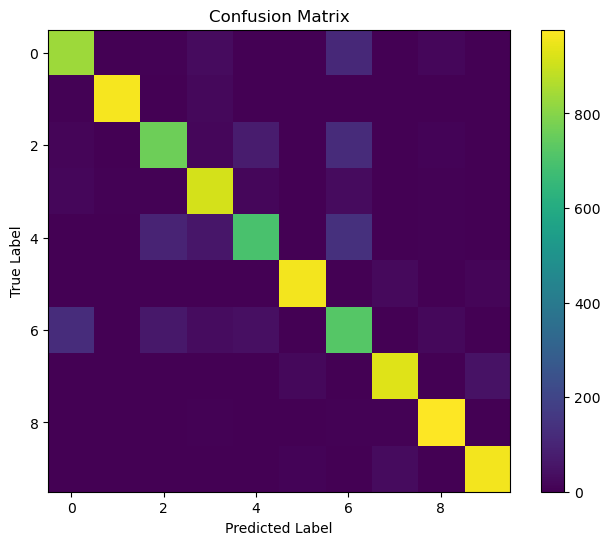

In [38]:
cm = confusion_matrix(y_test, ypred_label
                      )

plt.figure(figsize=(8,6))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()


### Inference (Confusion Matrix)
The confusion matrix highlights which classes are most frequently confused.
This is especially important in Fashion-MNIST where some categories have very similar shapes and textures.


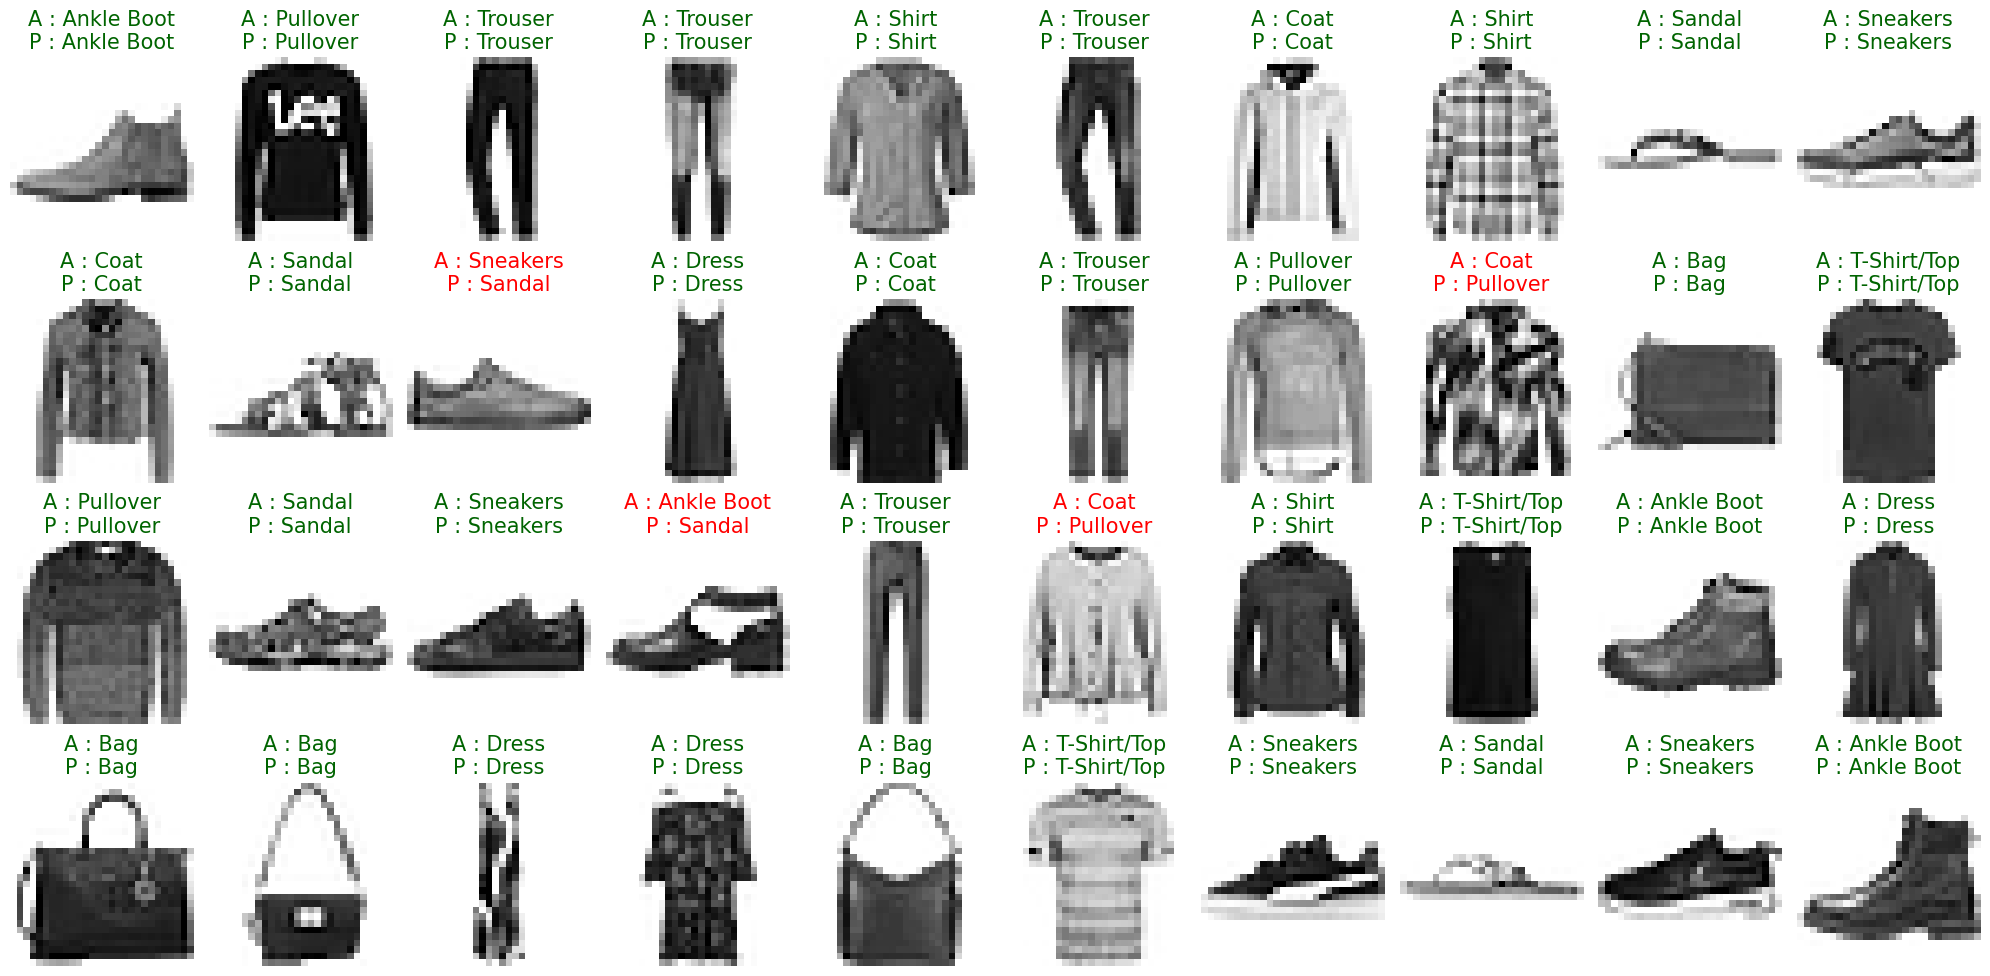

In [39]:
# see the image of 40
nrows = 4
ncols = 10
t = 1
plt.figure(figsize=(20,10))
for i in range(nrows*ncols):
  plt.subplot(nrows,ncols,t)
  plt.imshow(x_test[i],cmap='binary')
  color = 'red' if y_test[i] != ypred_label[i] else 'darkgreen'
  plt.title(f'A : {label_names[y_test[i]]}\nP : {label_names[ypred_label[i]]}',color =color,fontsize = 15)
  plt.axis('off')
  t+=1
plt.tight_layout()
plt.show()

Total misclassified samples: 1285


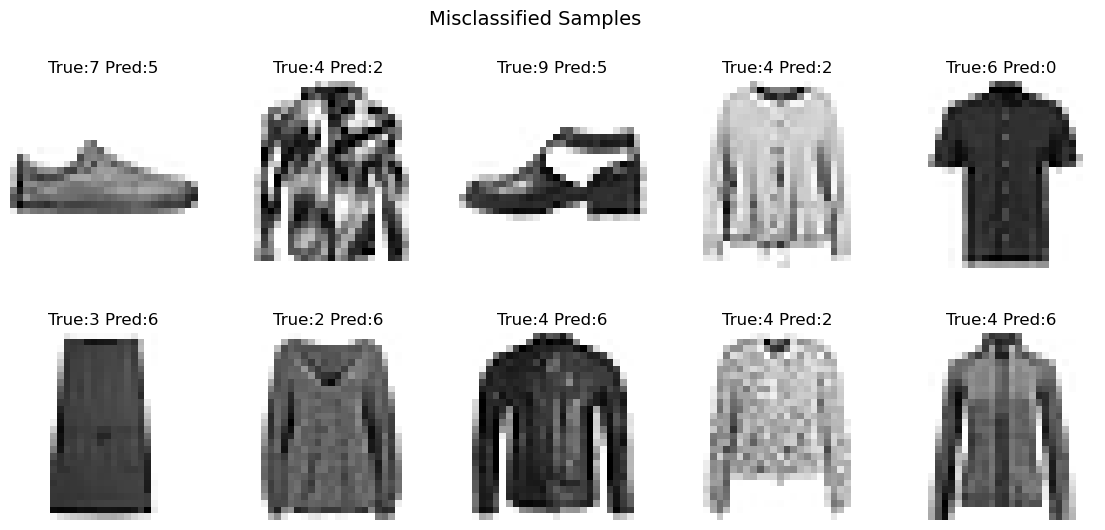

In [40]:
# ypred is probability output (10000,10)
# convert to class label (10000,)
y_pred_labels = np.argmax(ypred, axis=1)

# now compare correctly
misclassified_idx = np.where(y_pred_labels != y_test)[0]
print("Total misclassified samples:", len(misclassified_idx))

plt.figure(figsize=(14,6))

for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx], cmap="binary")
    plt.title(f"True:{y_test[idx]} Pred:{y_pred_labels[idx]}")
    plt.axis("off")

plt.suptitle("Misclassified Samples", fontsize=14)
plt.show()



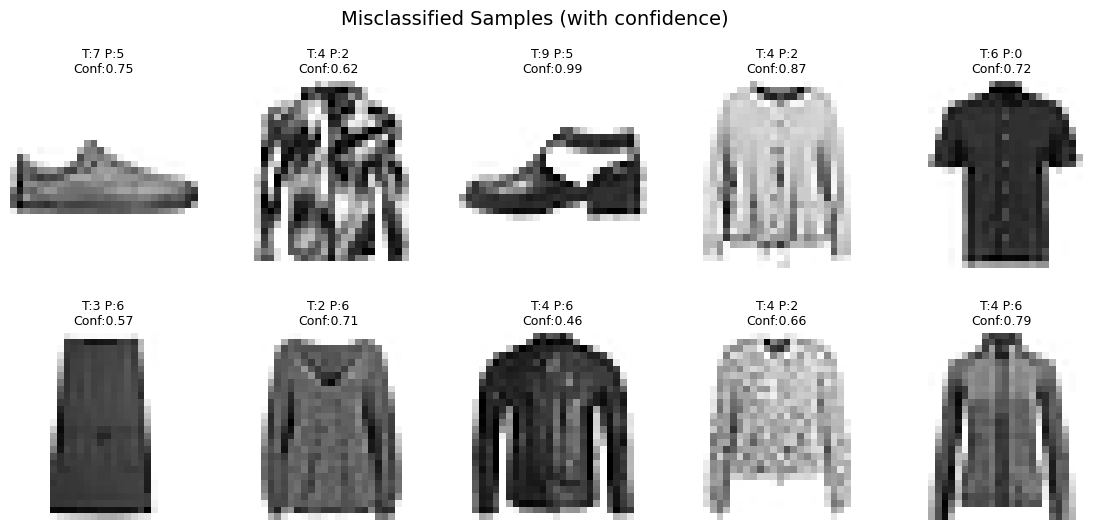

In [41]:
plt.figure(figsize=(14,6))

for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx], cmap="binary")

    true_label = y_test[idx]
    pred_label = y_pred_labels[idx]
    confidence = np.max(ypred[idx])

    plt.title(f"T:{true_label} P:{pred_label}\nConf:{confidence:.2f}", fontsize=9)
    plt.axis("off")

plt.suptitle("Misclassified Samples (with confidence)", fontsize=14)
plt.show()


### Inference (Misclassified Samples)
The model outputs a probability distribution across 10 classes for every image.
Using `argmax()` converts probabilities into the final predicted label.
Misclassified samples help identify difficult patterns and visually similar categories that confuse the model.


# ✅ Final Conclusion

## ✅ Summary
This notebook successfully builds an ANN-based image classification pipeline on Fashion-MNIST including:
- Preprocessing (normalization + flattening)
- Model training
- Performance evaluation using accuracy and confusion matrix
- Error analysis through misclassified sample visualization

## ✅ Key Inferences
- Dense Neural Networks perform well on Fashion-MNIST but flattening removes spatial information.
- Most model confusion happens between visually similar clothing categories.
- Misclassified samples highlight edge cases and dataset ambiguity.

## 🚀 Future Scope (without changing batch size)
- Hyperparameter tuning (neurons, dropout rate, epochs)
- Add validation_split for val_accuracy tracking
- Compare 2–3 Dense architectures and report best one



In [42]:
model.save("fashion_mnist_ann.h5")
print("✅ Model saved!")


✅ Model saved!


In [43]:
from tensorflow import keras

# load old model (your existing file)
model = keras.models.load_model("fashion_mnist_ann.h5", compile=False)

# save again in NEW recommended format
model.save("fashion_mnist_ann.keras")
print("✅ Saved as .keras format successfully!")


✅ Saved as .keras format successfully!
